In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv("Fraud_check.csv")


In [118]:
# Start exploring the dataset
print(data.columns)
data.head()

Index(['Undergrad', 'Marital_Status', 'Taxable_Income', 'City_Population',
       'Work_Experience', 'Urban'],
      dtype='object')


,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [120]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

# the results of a PCA Dimensionality reduction to protect user identities and sensitive features

(6, 6)
       Taxable_Income  City_Population  Work_Experience
count        6.000000         6.000000         6.000000
mean     58734.000000    109182.333333        11.000000
std      22616.132516     61251.068920        10.392305
min      38374.000000     28768.000000         2.000000
25%      44187.250000     67362.500000         4.000000
50%      50672.500000    110301.500000         7.000000
75%      66609.250000    147857.750000        15.250000
max      98738.000000    192297.000000        29.000000


<AxesSubplot:>

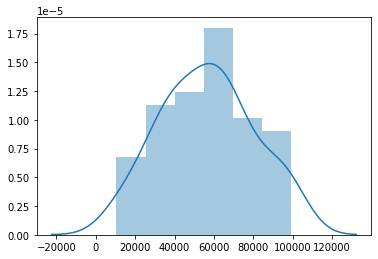

In [88]:
# distribution of Amount
T_I = [data['Taxable_Income'].values]
sns.distplot(T_I)

<AxesSubplot:>

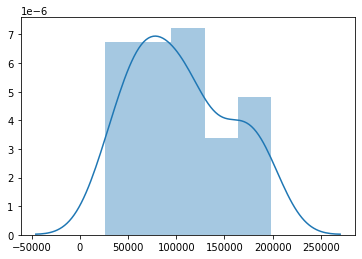

In [89]:
C_P = [data['City_Population'].values]
sns.distplot(C_P)

<AxesSubplot:>

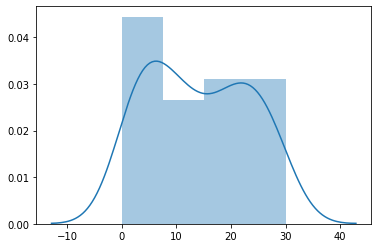

In [90]:
W_E = [data['Work_Experience'].values]
sns.distplot(W_E)

In [91]:
data.loc[data["Taxable_Income"]>=30000,"Income"]="Good "
data.loc[data["Taxable_Income"]<=30000,"Income"]="Risky"

In [92]:
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income
547,YES,Single,92819,42690,25,YES,Good
522,NO,Divorced,43980,103343,10,NO,Good
449,NO,Married,92007,27875,11,NO,Good
407,NO,Single,33138,52144,6,NO,Good
131,YES,Single,56501,174321,16,YES,Good
559,YES,Divorced,72026,180424,26,NO,Good
424,YES,Married,72268,94199,0,YES,Good
156,YES,Married,39114,125987,3,YES,Good
436,NO,Divorced,98738,158057,4,YES,Good
203,YES,Divorced,56536,117260,4,NO,Good


In [93]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [94]:

## Collecting the column names
colnames = list(data.columns)
colnames

['Undergrad',
 'Marital_Status',
 'Taxable_Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'Income']

In [95]:
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Income
547,1,2,92819,42690,25,1,0
522,0,0,43980,103343,10,0,0
449,0,1,92007,27875,11,0,0
407,0,2,33138,52144,6,0,0
131,1,2,56501,174321,16,1,0
559,1,0,72026,180424,26,0,0
424,1,1,72268,94199,0,1,0
156,1,1,39114,125987,3,1,0
436,0,0,98738,158057,4,1,0
203,1,0,56536,117260,4,0,0


In [96]:

x= data.iloc[:,0:5]
y= data.iloc[:,5]

# Now we will be visualizing all the features from the dataset on graphs.

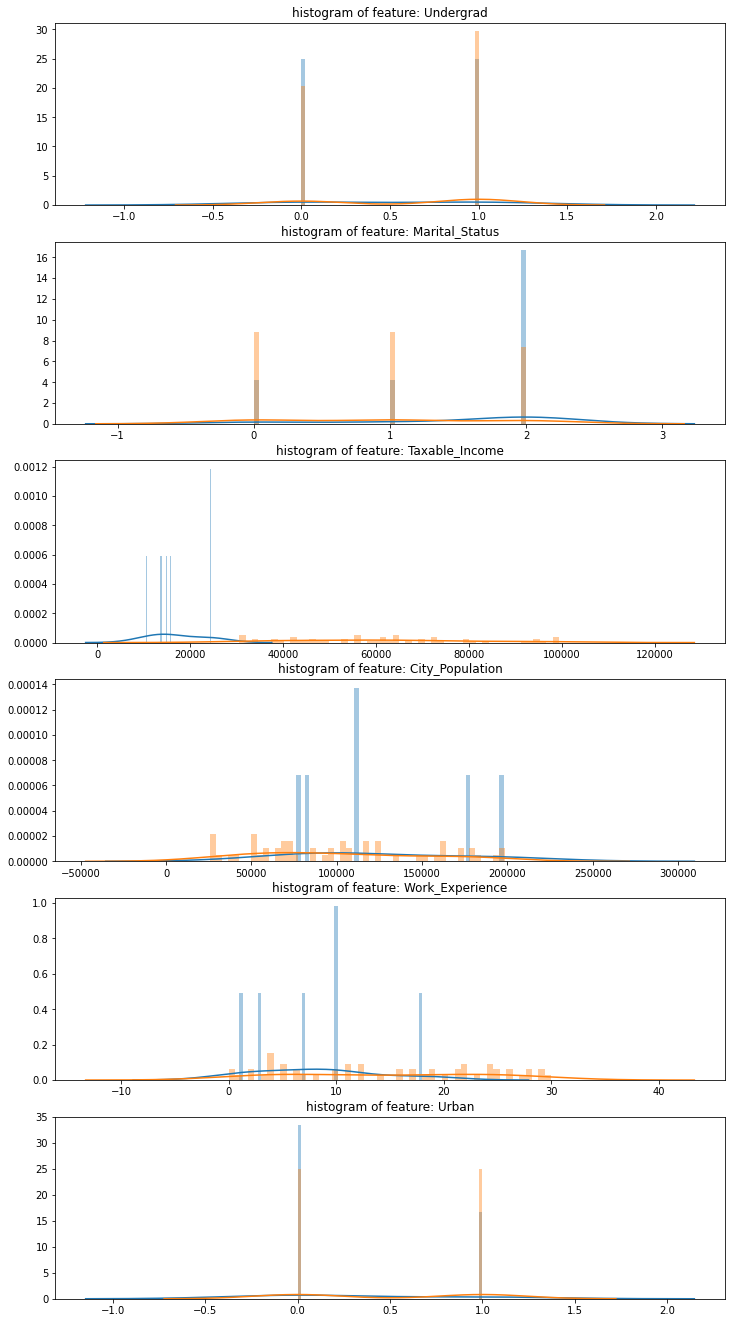

In [97]:
from matplotlib import gridspec
# distribution of anomalous features
features = data.iloc[:,0:6].columns

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.distplot(data[c][data.Income== 1], bins=50)
    sns.distplot(data[c][data.Income == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(c))
plt.show()

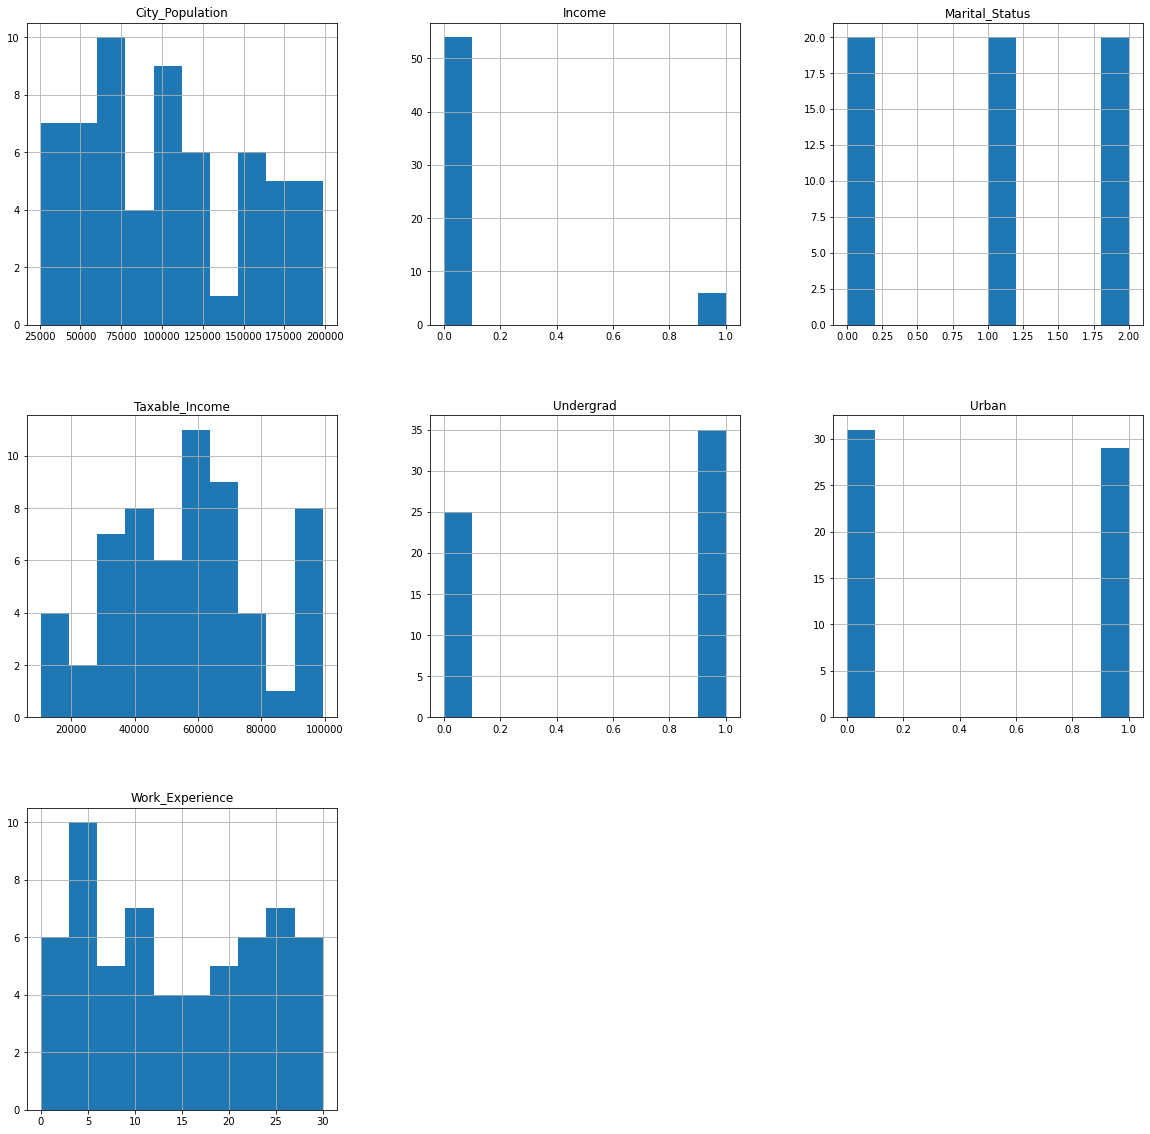

In [98]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()


# Let’s separate the Fraudulent cases from the authentic ones and compare their occurrences in the dataset.

In [99]:

Fraud = data[data['Income'] == 1]
Valid = data[data['Income'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Income'] == 1])))
print('Valid cases: {}'.format(len(data[data['Income'] == 0])))


0.1111111111111111
Fraud Cases: 6
Valid cases: 54


# There is only 0.1% fraudulent cases out all the cases.

In [100]:
print("Work_exp Details in fradulent cases")
Fraud.Work_Experience.describe()

Work_exp Details in fradulent cases


count     6.000000
mean      8.166667
std       6.047038
min       1.000000
25%       4.000000
50%       8.500000
75%      10.000000
max      18.000000
Name: Work_Experience, dtype: float64

In [101]:
print("Work_Exp details in valid cases")
Valid.Work_Experience.describe()

Work_Exp details in valid cases


count    54.000000
mean     14.648148
std       9.286138
min       0.000000
25%       5.250000
50%      15.000000
75%      22.750000
max      30.000000
Name: Work_Experience, dtype: float64

# Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.


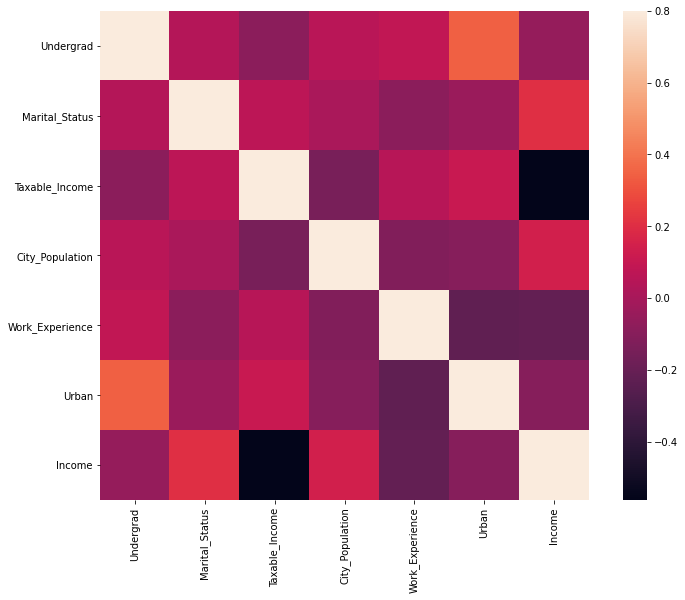

In [102]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


# This gives us a deeper understanding of the Data available to us.
In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other.

In [103]:
#Droping the Taxable income variable - we taken that as Income description
data.drop(["Taxable_Income"],axis=1,inplace=True)

# let’s proceed with dividing the data values 

In [104]:
x= data.iloc[:,0:5]
y= data.iloc[:,5]

In [105]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Building the Isolation Forest Model
Isolation forest is generally used for Anomaly detection

In [106]:
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix

# Isolation Forest Classifier

In [109]:
#Building another model/classifier ISOLATION FOREST
from sklearn.ensemble import IsolationForest
ifc=IsolationForest(max_samples=len(X_train),
                    contamination=outlier_fraction,random_state=1)
ifc.fit(X_train)
scores_pred = ifc.decision_function(X_train)
y_pred = ifc.predict(X_test)
y_pred

array([ 1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1])

In [111]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()
n_errors

0

# Evaluate the Model and print the results. We will be calculating the Accuracy, Precision, Recall, F1-Score and the Matthews correlation coefficient for the sake of totality.

In [113]:
#printing every score of the classifier
#scoring in any thing

from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
print("the Model used is {}".format("Isolation Forest"))
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))


the Model used is Isolation Forest
The accuracy is  1.0
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is0.0


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1464: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt

# Visualizing the Confusion Matrix for this model.

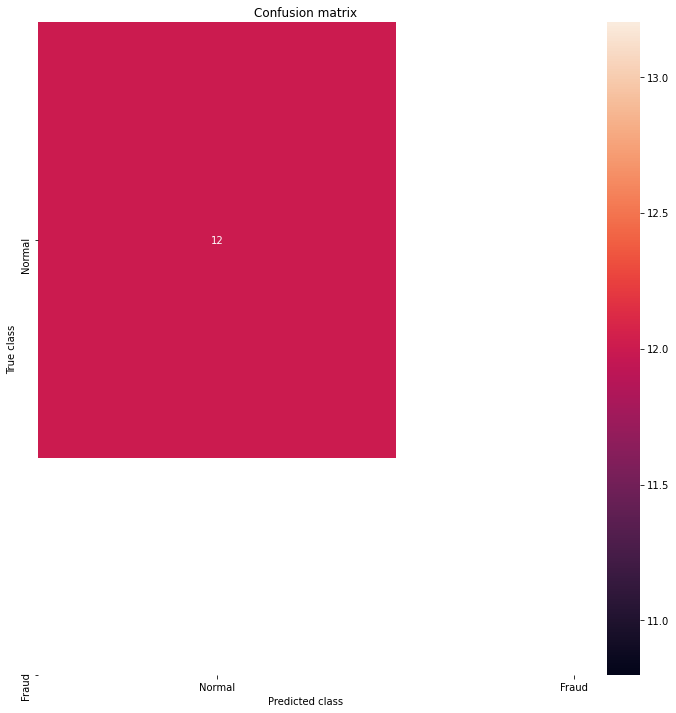

In [112]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS,
            yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()


In [59]:
# Run classification metrics

print('{}: {}'.format("Isolation Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Isolation Forest: 3
0.75
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.00      0.00      0.00         0

    accuracy                           0.75        12
   macro avg       0.50      0.38      0.43        12
weighted avg       1.00      0.75      0.86        12



C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# Building the Random Forest Model
 Random Forest Classifier

In [60]:
# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
# predictions
y_pred = rfc.predict(X_test)

In [61]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

# Building an Evaluation matrix on test set

In [62]:
#printing every score of the classifier
#scoring in any thing
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(Fraud)
n_errors = (y_pred != Y_test).sum()
print("The model used is Random Forest classifier")
acc= accuracy_score(Y_test,y_pred)
print("The accuracy is  {}".format(acc))
prec= precision_score(Y_test,y_pred)
print("The precision is {}".format(prec))
rec= recall_score(Y_test,y_pred)
print("The recall is {}".format(rec))
f1= f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(f1))
MCC=matthews_corrcoef(Y_test,y_pred)
print("The Matthews correlation coefficient is {}".format(MCC))

The model used is Random Forest classifier
The accuracy is  0.9166666666666666
The precision is 0.0
The recall is 0.0
The F1-Score is 0.0
The Matthews correlation coefficient is 0.0


C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:846: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


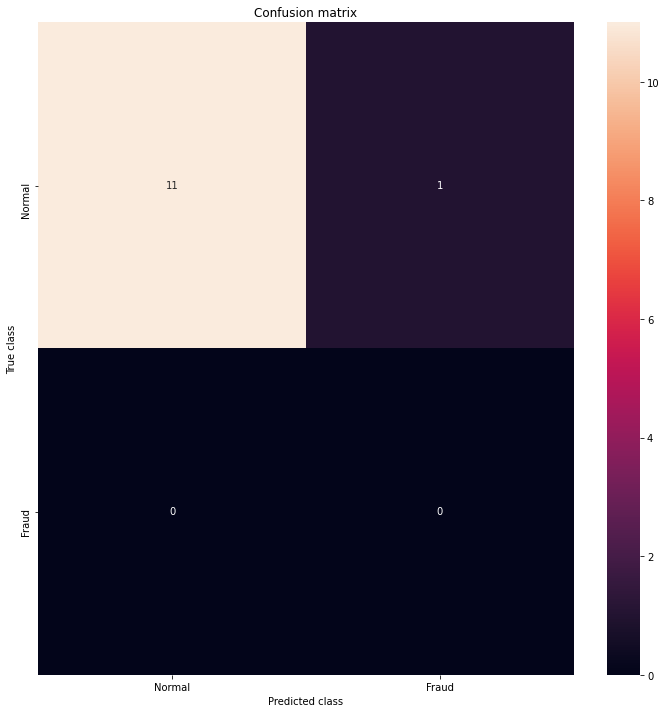

In [63]:
#printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [64]:
# Run classification metrics
plt.figure(figsize=(9, 7))
print('{}: {}'.format("Random Forest", n_errors))
print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Random Forest: 1
0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.00      0.00      0.00         0

    accuracy                           0.92        12
   macro avg       0.50      0.46      0.48        12
weighted avg       1.00      0.92      0.96        12



C:\Users\pcs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 648x504 with 0 Axes>

# Visualizing the Forest
A single tree from the forest is taken randomly and then visualized for the sake of knowing how the Algorithm is taking its decision and this will help in changing the model 

In [65]:
!pip install pydot

# Visualizing the Forest
A single tree from the forest is taken randomly and then visualized for the sake of knowing how the Algorithm is taking its decision and this will help in changing the model 

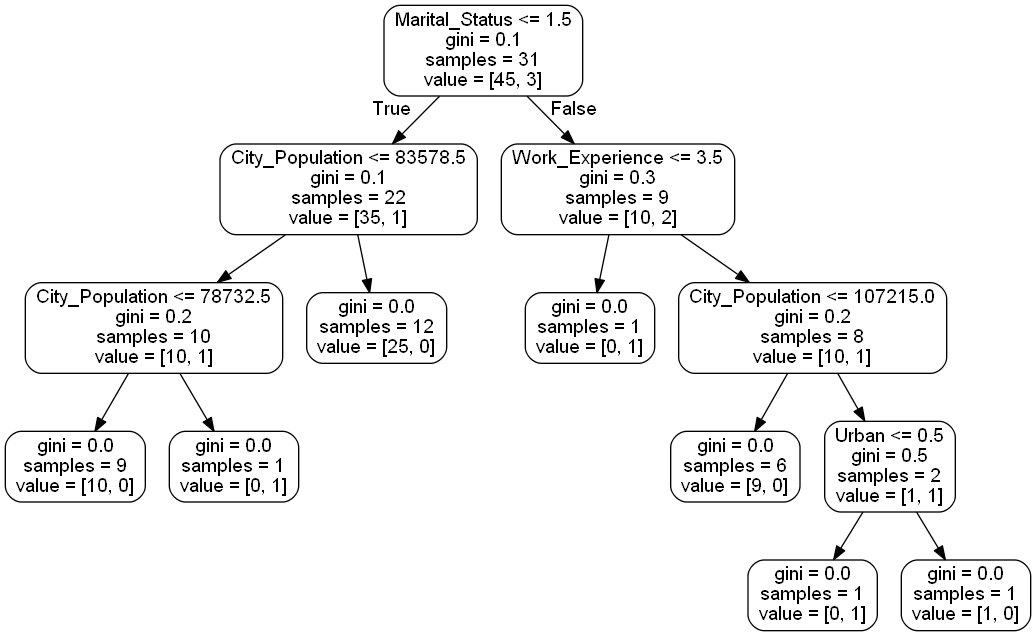

In [67]:
#visualizing the random tree 
feature_list = list(x.columns)
# Import tools needed for visualization
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydot

#pulling out one tree from the forest
tree = rfc.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
display(Image(graph.create_png()))

# CONCLUSION:-

The model is fast, it is definitely simple and most importantly easily interpretable as shown in the Decision Tree diagram. 